In [23]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# cargar los datos
df = pd.read_csv('spectra_lle_SNG.csv')

# separar las características (X) y la etiqueta (y)
X = df.drop('id', axis=1)
y = df['id']

# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [24]:
df['id'].unique()

array([1, 2, 3], dtype=int64)

In [25]:
# crear el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [26]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
319/319 [==============================] - 2s 4ms/step - loss: 0.3525 - accuracy: 0.9492 - val_loss: 0.2026 - val_accuracy: 0.9517
Epoch 2/50
319/319 [==============================] - 1s 4ms/step - loss: 0.1958 - accuracy: 0.9517 - val_loss: 0.1484 - val_accuracy: 0.9521
Epoch 3/50
319/319 [==============================] - 1s 4ms/step - loss: 0.1286 - accuracy: 0.9571 - val_loss: 0.0860 - val_accuracy: 0.9608
Epoch 4/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0865 - accuracy: 0.9686 - val_loss: 0.0599 - val_accuracy: 0.9725
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9760 - val_loss: 0.0453 - val_accuracy: 0.9851
Epoch 6/50
319/319 [==============================] - 1s 4ms/step - loss: 0.0546 - accuracy: 0.9792 - val_loss: 0.0390 - val_accuracy: 0.9843
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9814 - val_loss: 0.0367 - val_accuracy: 0.9843
Epoch 

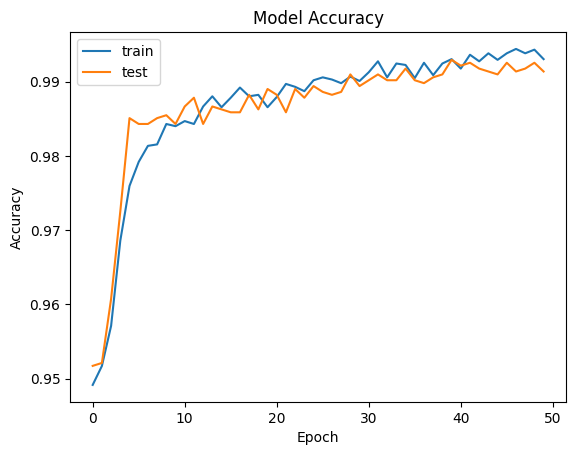

In [27]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


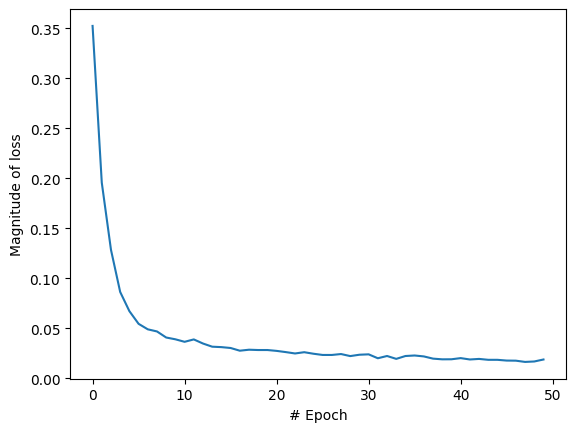

In [28]:
plt.xlabel("# Epoch")
plt.ylabel("Magnitude of loss")
plt.plot(history.history["loss"])

In [29]:
y=df['id']
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(y)
encoder = LabelEncoder()
df['codificado'] = encoder.fit_transform(df['id'])

nombres_etiquetas = encoder.classes_
nuevos_nombres = ['Symbiotics', 'Planetary Nebulae', 'Red Giants']
nombres_etiquetas_dict = {nombres_etiquetas[i]: nuevos_nombres[i] for i in range(len(nombres_etiquetas))}
df['nombres_etiquetas'] = df['id'].map(nombres_etiquetas_dict)

df_agrupado = df.groupby('nombres_etiquetas')['codificado'].mean()
print(df_agrupado)

nombres_etiquetas
Planetary Nebulae    1.0
Red Giants           2.0
Symbiotics           0.0
Name: codificado, dtype: float64


In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


80/80 [==============================] - 0s 2ms/step
[[  22   16    0]
 [   3   79    3]
 [   0    0 2425]]


In [31]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8800    0.5789    0.6984        38
           1     0.8316    0.9294    0.8778        85
           2     0.9988    1.0000    0.9994      2425

    accuracy                         0.9914      2548
   macro avg     0.9034    0.8361    0.8585      2548
weighted avg     0.9914    0.9914    0.9908      2548



In [32]:
from sklearn.metrics import  accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9913657770800628


In [33]:
print("size of the splits")
print("X_train: ",  X_train.shape)
print("X_test: ",  X_test.shape)
print("y_test: ",  y_test.size)
print("y_pred: ",  y_pred.size)

size of the splits
X_train:  (10189, 15)
X_test:  (2548, 15)
y_test:  2548
y_pred:  2548


In [34]:
model.save('LLE_RNA_SNG.h5')